# Annotations to Article `Digital Reconstruction of Multidimensional Signals from their Projections`

Authors: R.M. Mersereau , A.V. Oppenheim

Proceeding of the IEEE Vol. 62, No. 10 October 1974

## Motivation

The article has been cited frequently in the literature on `computerized tomography' as it seems to provide some guidelines how to reconstruct a multidimensional signal from its projections. 

In this notebook I will try to make sense of parts of this article and try to prove the formulas specifically for the 2D case.

----

Part I. Introduction reviews a bit of history on how to reconstruct a multidimensional signal (eg. image) from its projections.

---

## Part II. `Theoretical Background`

The concept of a multidimensional signal, its multidimensional Fourier transform and its inverse transform are presented.

In this section only the 2D case considered:

A continous 2D function $f(x,\ y)$ is related to its 2D-Fourier transform $F(u,\ v)$ :

$$
F(u,v) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} f(x,y) \cdot exp \left[-j \cdot 2\pi \cdot \left(u \cdot x + v \cdot y \right) \right] \cdot dx \cdot dy
$$

The inverse Fourier transform is given by:

$$
f(x,\ y ) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} F(u,\ v) \cdot exp\left[j \cdot 2\pi \cdot \left(u \cdot x + v \cdot y\right) \right] \cdot du \cdot dv
$$

----

A relationship between the 2D Fourier transform $F(u,\ v)$ and samples of $f(x,\ y)$ established.

A separate Jupyter notebook gives an overview and derives the result:

$$
F(u,\ v) = T_x \cdot T_y \cdot \sum_{l_v=-\infty}^{\infty} \sum_{l_u=-\infty}^{\infty} f\left( x=l_u \cdot T_x,\ y=l_v \cdot T_y \right) \cdot exp\left[-j \cdot 2\pi \cdot \left(l_u \cdot T_x \cdot u + l_v \cdot T_y \cdot v \right) \right]
$$

**prerequisites**

$F(u,\ v)$ shall be bandlimited to the range of *frequencies* $-B_u / 2 \le u \le B_u / 2$ and $-B_v / 2 \le v \le B_v / 2$. In this equation function $f(x,\ y)$ is sampled with sampling spacings $T_x$, $T_y$ defined by these equations.

$$\begin{gather}
T_x = \frac{1}{B_u} \\
T_y = \frac{1}{B_v}
\end{gather}
$$

---

Since $F(u,\ v)$ is assumed bandlimited a sampling theorem can be formulated. The sampling theorem relates the samples of function $f(x,\ y)$ to the continous function $f(x,\ u$ by means of an interpolation function.

$$
f(x,\ y ) = \sum_{l_y=-\infty}^{\infty} \sum_{l_x=-\infty}^{\infty} f\left( x=l_x \cdot T_x,\ y=l_y \cdot T_y \right) \cdot sinc\left(\pi \cdot (\frac{x}{T_x}-l_x) \right) \cdot sinc\left(\pi \cdot (\frac{y}{T_y}-l_y) \right)
$$

(details on how to derive this formula can be found in a Jupyter notebook.)

----

### Projections

The concept of projections is introduced for the general multidimensional case. Here only the two dimensional case will be reviewed.

A projection of a 2D function is a mapping obtained by integrating $f(x,\ y)$ along a particular path / direction. From the article this example is provided:

$$
p_y(x) = \int_{-\infty}^{\infty} f(x,\ y) \cdot dy
$$

More general forms of projections along straight lines in the $x,\ y$ plane are defined. To this end the article introduces a *rotated* coordinate system.

The figure shows a *rotated* coordinate systems where the  rotation by an angle $\theta$ is around the origin of the $x,\ y$ coordinate system. The rotated coordinate system has axes denoted $x',\ y'$.

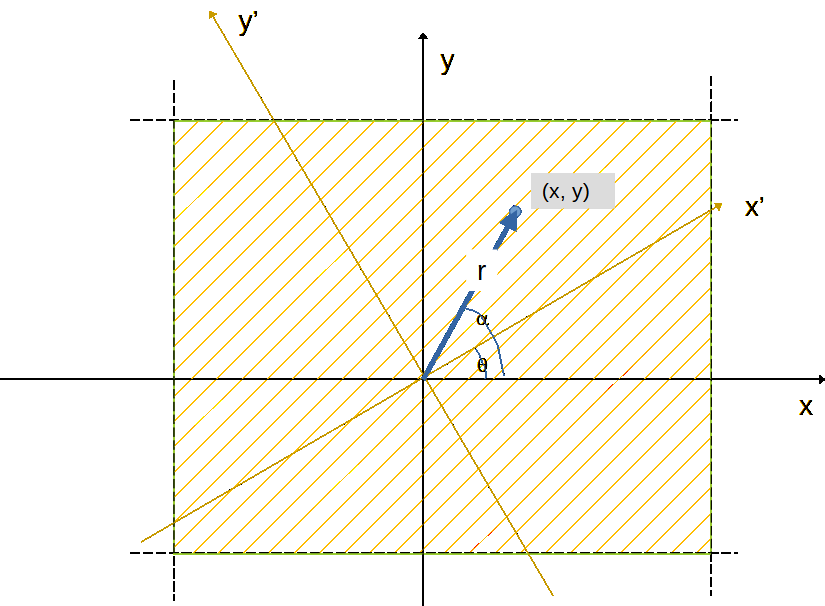

In the original $x,\ y$ coordinate system point $x,\ y$ is expressed in polar coordinates:

$$\begin{gather}
x = r \cdot cos(\alpha)\\
y = r \cdot sin(\alpha)
\end{gather}
$$

The same point is expressed in polar coordinates in the rotated $x', y')$ coordinate system.

$$\begin{gather}
x' = r \cdot cos(\alpha - \theta) = r \cdot cos(\alpha) \cdot cos(\theta) + r \cdot sin(\alpha) \cdot sin(\theta)\\
y' = r \cdot sin(\alpha -\theta) = r \cdot sin(\alpha) \cdot cos(\theta) - r \cdot cos(\alpha) \cdot sin(\theta) \\
\end{gather}
$$

To convert from $x,\ y$ coordinates to $x',\ y'$ coordinates we use:

$$\begin{gather}
x' = x \cdot cos(\theta) + y \cdot sin(\theta)\\
y' = - x \cdot sin(\theta) + y \cdot cos(\theta)
\end{gather}
$$

and from $x',\ y'$ coordinates to $x,\ y$ coordinates

$$\begin{gather}
x = x' \cdot cos(\theta) - y' \cdot sin(\theta)\\
y = x' \cdot sin(\theta) + y' \cdot cos(\theta)
\end{gather}
$$

Example:

Let $x'=a$ and $y' \ variable$. This is a straight line in the $x',\ y'$ system which is parallel to the $y'$ axis and intercepts axis $x'$ at $a$.

How is this line transformed to the $x,\ y$ system ? The line coordinates are obtained as follows

$$\begin{gather}
x = a \cdot cos(\theta) - y' \cdot sin(\theta) \\
y = a \cdot sin(\theta) + y' \cdot cos(\theta)
\end{gather}
$$

These equations can be equivalently expressed by:

$$
x \cdot cos(\theta) + y \cdot sin(\theta) = a
$$

or

$$
y = - x \cdot \frac{1}{tan(\theta)} + a
$$

which is a line with slope $-\frac{1}{tan(\theta)}$ and intercept $a$

----

### Special cases 

The projections along a specific direction are related to the 2D Fourier transform via the `projection slice theorem` (sometimes referred to as `central slice theorem`). For two special cases this shall be demonstrated before a more general formula is derived.

**case A**

The projections $P_y(x)$ for all projection lines parallel to the $y$ axis of the $x,\ y$ coordinate system shall be computed.

$$
p_y(x) = \int_{-\infty}^{\infty} f(x, y) \cdot dy
$$

Evaluating the 2D Fourier transform for $v=0$ we get:

$$\begin{gather}
F(u,v=0) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} f(x,y) \cdot exp \left[-j \cdot 2\pi \cdot u \cdot x \right] \cdot dx \cdot dy \\
F(u,v=0) = \int_{-\infty}^{\infty} \underbrace{\left( \int_{-\infty}^{\infty} f(x,y) \cdot dy \right)}_{p_y(x)} \cdot exp \left[-j \cdot 2\pi \cdot u \cdot x \right] \cdot dx \\
F(u,v=0) = \int_{-\infty}^{\infty} p_y(x) \cdot exp \left[-j \cdot 2\pi \cdot u \cdot x \right] \cdot dx
\end{gather}
$$

Thus the 2D Fourier transform $F(u,v=0)$ evaluated for $u, 0$ is just the 1D Fourier transform of the projections $p_y(x)$ along the $y$ axis.

**case B**

The projections $P_x(y)$ for all projection lines parallel to the $x$ axis of the $x,\ y$ coordinate system shall be computed.

$$
p_x(y) = \int_{-\infty}^{\infty} f(x, y) \cdot dx
$$

Evaluating the 2D Fourier transform for $u=0$ we get:

$$\begin{gather}
F(u=0,v) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} f(x,y) \cdot exp \left[-j \cdot 2\pi \cdot v \cdot y \right] \cdot dx \cdot dy \\
F(u=0,v) = \int_{-\infty}^{\infty} \underbrace{\left( \int_{-\infty}^{\infty} f(x,y) \cdot dx \right)}_{p_x(y)} \cdot exp \left[-j \cdot 2\pi \cdot v \cdot y \right] \cdot dy \\
F(u=0,v) = \int_{-\infty}^{\infty} p_x(y) \cdot exp \left[-j \cdot 2\pi \cdot v \cdot y \right] \cdot dy
\end{gather}
$$

Thus the 2D Fourier transform $F(u=0,v)$ evaluated for $u=0, v$ is just the 1D Fourier transform of the projections $p_x(y)$ along the $x$ axis.

Cases `A` and `B` are special cases of the `projection slice theorem` which will be derived now.



### Projection Slice Theorem (Central Slice Theorem)

The projection lines shall be lines *parallel* to the $y'$ axis of $x',\ y'$ coordinate system which is rotated by angle $\theta$ with respect to the $x,\ y$ coordinate system.

For the projections we get:

We evaluate the 2D Fourier transform $F(u,\ v)$ for specific value pairs $u,\ v$ namely $u=S \cdot cos(\theta),\ v= S \cdot sin(\theta)$:

$$
F(S \cdot cos(\theta),\ S \cdot sin(\theta)) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} f(x,y) \cdot exp \left[-j \cdot 2\pi \cdot S \cdot \left(x \cdot cos(\theta) + y \cdot sin(\theta) \right) \right] \cdot dx \cdot dy
$$

In the rotated coordinate system $x',\ y'$ variables $x,\ y$ are expressed by:

$$\begin{gather}
x = x' \cdot cos(\theta) - y' \cdot sin(\theta)\\
y = x' \cdot sin(\theta) + y' \cdot cos(\theta)
\end{gather}
$$

Inserting into the equation for $F(u,v)$ yields:

$$\begin{gather}
F(S \cdot cos(\theta),\ S \cdot sin(\theta)) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} f(x' \cdot cos(\theta) - y' \cdot sin(\theta),\ x' \cdot sin(\theta) + y' \cdot cos(\theta)) \cdot exp \left[-j \cdot 2\pi \cdot S \cdot x' \right] \cdot dx' \cdot dy' \\
F(S \cdot cos(\theta),\ S \cdot sin(\theta)) = \int_{-\infty}^{\infty} \left(\int_{-\infty}^{\infty} f(x' \cdot cos(\theta) - y' \cdot sin(\theta),\ x' \cdot sin(\theta) + y' \cdot cos(\theta)) \cdot dy' \right) \cdot exp \left[-j \cdot 2\pi \cdot S \cdot x' \right] \cdot dx' 
\end{gather}
$$

The inner integral is denoted $p_{\theta}(x')$

$$
p_{\theta}(x') = \int_{-\infty}^{\infty} f(x' \cdot cos(\theta) - y' \cdot sin(\theta),\ x' \cdot sin(\theta) + y' \cdot cos(\theta)) \cdot dy'
$$

It is the projection for a specific value $x'$ along the $y'$ axis. Finally we the formula of the `projection slice theorem`.

$$
F(S \cdot cos(\theta),\ S \cdot sin(\theta)) = \int_{-\infty}^{\infty} p_{\theta}(x') \cdot exp \left[-j \cdot 2\pi \cdot S \cdot x' \right] \cdot dx' 
$$

The theorem establishes a relation between the 2D Fourier transform along a line $(S \cdot cos(\theta),\ S \cdot sin(\theta))$ in polar coordinates and the 1D Fourier transform of projections for a specific angle $\theta$.


## Part III. `Exact reconstruction from a finite number of projections`

not considered here, because irrelevant for practical applications ...

## Part IV `Approximate reconstruction from a polar raster`



The inverse Fourier transform

$$
f(x,\ y ) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} F(u,\ v) \cdot exp\left[j \cdot 2\pi \cdot \left(u \cdot x + v \cdot y\right) \right] \cdot du \cdot dv
$$

evaluated with $u,\ v$ replaced by polar coordinates. 

In polar coordinates we have 

$$\begin{gather}
u = S \cdot cos(\theta) \\
v = S \cdot sin(\theta)
\end{gather}
$$

$$
f(x,\ y ) = \int_{0}^{\pi} \int_{-\infty}^{\infty} F(S \cdot cos(\theta),\ S \cdot sin(\theta)) \cdot exp\left[j \cdot 2\pi \cdot \left(S \cdot x \cdot cos(\theta) + S \cdot sin(\theta) \cdot y\right) \right] \cdot |S| \cdot dS \cdot d\theta
$$

In the last equation the change to polar coordinates required to replace $du \cdot dv$ by $|S| \cdot dS \cdot d\theta$ (due to the properties of the Jacobian determinant). 

The last equation may be rewritten like this:

$$
f(x,\ y ) = \int_{0}^{\pi} \int_{-\infty}^{\infty} F(S \cdot cos(\theta),\ S \cdot sin(\theta)) \cdot |S| \cdot exp\left[j \cdot 2\pi \cdot S \cdot \left(x \cdot cos(\theta) + y  \cdot sin(\theta)\right) \right] \cdot dS \cdot d\theta
$$

In the inner integral $F(S \cdot cos(\theta),\ S \cdot sin(\theta))$ is the 1D Fourier transform of the projections taken at angle $\theta$. The multiplication by $|S|$ is interpreted as filtering operation applied to the 1D Fourier transform of the projection. To this product a 1D inverse Fourier transform is applied. In the literature the result is often referred to a a filtered projection. The outer integral sums the filtered projections for all projection angles $\theta$. This operation is often called the `filtered backprojection`.

#### Practical Considerations

1) The reconstruction of $f(x,\ y)$ requires infinitly many projections, which must be filtered (either in the frequency or in the signal domain).

2) In any practical context only a limited number of projections are available (finite number of projection angles $\theta$)

3) From the finite number of projections a finite number of 2D frequency samples can be derived. To apply the inverse 2D Fourier transform to reconstruct $f(x, y)$ some kind of interpolation in the frequency domain must be done. (resulting artifacts due to approximation errors due to interpolation)



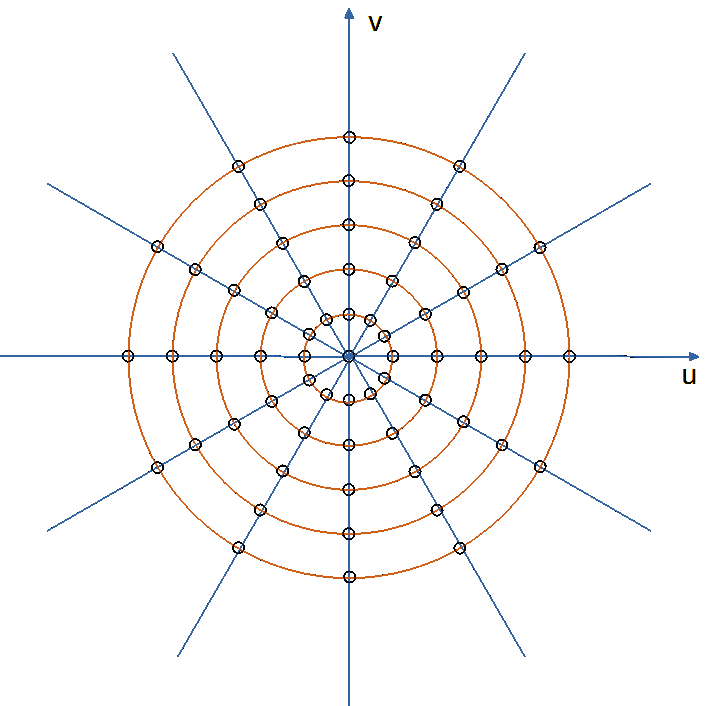




3) ### From Polar to Cartesian Coordinates

Projections are available (from computations or measurements) on an evenly spaced grid of angles $\theta_k$. The angular spacing shall be denoted $\Delta \theta$. In total the number of projections and therefore the number of angles shall be $K$.

$$
\Delta \theta = \frac{\pi }{K}
$$

$$\begin{gather}
\theta_k = k \cdot \Delta \theta \\
0 \le k \le K-1
\end{gather}
$$

The projections for a specific angle $\theta_k$ are obtained for $2 \cdot L - 1$ discrete values in the range $-T_p \le t \le T_p$. We assume discrete values $t_l$ for $t$.

With increments $\Delta t = \frac{T_P}{L}$ this range is discretized with:


$$\begin{gather}
t_l = -T_p + l \cdot \Delta t \\
0 \le l \le 2 \cdot L - 1
\end{gather}
$$

The figures provide an idea how 2D frequency samples of the cartesian grid may be computed from samples of the polar grid.



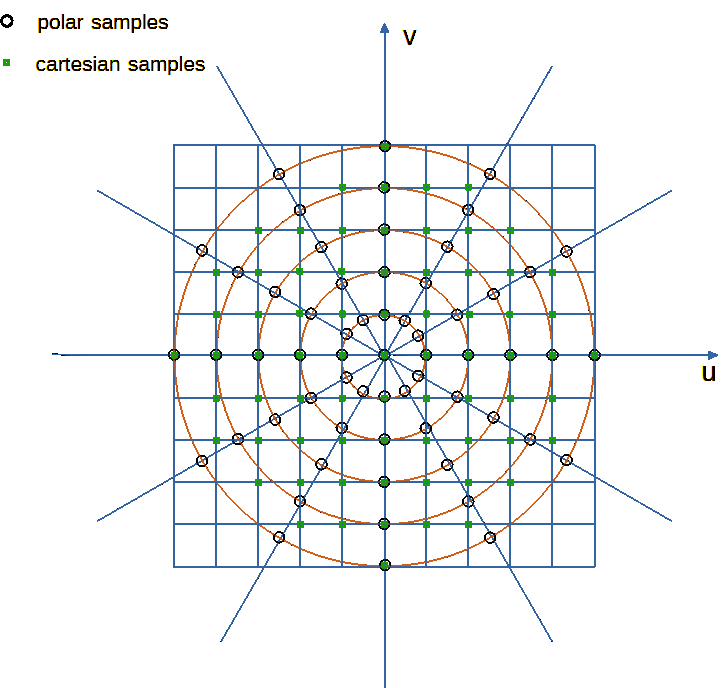

**Some observations**

1) Samples on the polar grid coincide with samples on the cartesian grid for angles $0$ and $\frac{\pi}{2}$. These samples need not be interpolated.

2) All other samples on the cartesian grid have exactly 4 neihgboring samples on the polar grid. 

3) The most simple approach will be to determine the sample of the polar grid being closest to the cartesian grid point. Then the value of the cartesian grid is taken from the *nearest neighbor*.

4) A more advanced interpolation scheme would take into account all 4 polar samples in a weighted fashion.

The next figure sketches  *nearest neighbor* and *linear interpolation* methods to get 2D frequency samples from the polar into the cartesian grid.

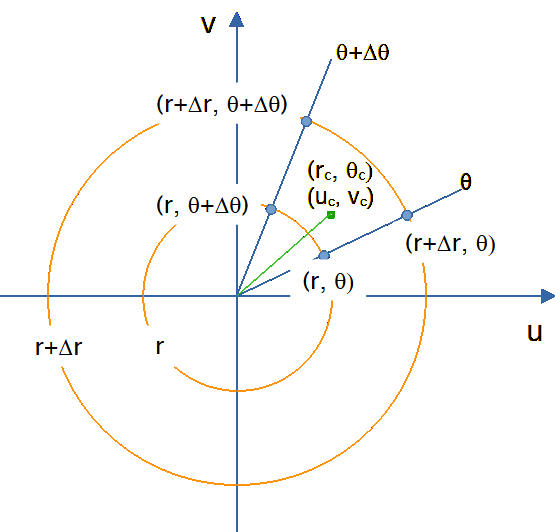


The frequency samples with cartesian coordinates $u_c, v_c$ shall be interpolated from the 4 frequency samples in polar coordinates. The samples in polar coordinates are denoted:

$$\begin{gather}
F_1(r,\ \theta) \\
F_2(r,\ \theta + \Delta \theta) \\
F_3(r + \Delta r,\ \theta) \\
F_4(r + \Delta r,\ \theta + \Delta \theta)
\end{gather}
$$

Regardless of the interpolation method used the first step is to find the polar coordinates of the 4 neighbors.

1) the cartesian coordinate $u_c, v_c$ is converted into polar coordinates $r_c, \theta_c$.

2) comparing radius $r_c$ with the radial grid of polar samples provides a radius $r$ with the condition $r \le r_c \le r + \Delta r$.

3) comparing angle $\theta_c$ with concentric grid of angles provides an angle $\theta$ with the condition $\theta \le \theta_c \le \theta + \Delta \theta$

4) having found $r, \theta$ and knowing the grid spacings $\Delta r,\ \Delta \theta$ the 4 polar coordinates have been identified.

**nearest neighbor**

The *nearest neighbor* approximation then requires just one more step:

The polar coordinates of the nearest sample are determined like this:

1) if radius $r_c$ is closer to radius $r$ than to $r + \Delta r$ select $r$ else select $r + \Delta r$.

2) if angle $\theta_c$ is closer to $\theta$ than to $\theta + \Delta \theta$ select $\theta$ else select $\theta + \Delta \theta$

3) take the polar sample at $r, \theta$ as nearest neighbor interpolant.

**linear interpolation**

1) interpolate between $F_1(r,\ \theta)$ and $F_2(r,\ \theta + \Delta \theta)$ to obtain the intermediate interpolant $F_{1,2}$.

$$
F_{1,2} = F_1(r,\ \theta) + \frac{F_2(r,\ \theta + \Delta \theta) - F_1(r,\ \theta)}{\Delta \theta} \cdot (\theta_c - \theta)
$$

2) interpolate between $F_3(r + \Delta r,\ \theta)$ and $F_4(r + \Delta r,\ \theta + \Delta \theta)$ to obtain the intermediate interpolant $F_{3,4}$.

$$
F_{3,4} = F_3(r + \Delta r,\ \theta) + \frac{F_4(r + \Delta r,\ \theta + \Delta \theta) - F_3(r + \Delta r,\ \theta)}{\Delta \theta} \cdot (\theta_c - \theta)
$$

3) interpolate between $F_{1,2}$ and $F_{3,4}$ to get the interpolate $F(u_c,\ v_c)$ for the cartesian sample.

$$
F(u_c, v_c) = F_{1,2} + \frac{F_{3,4} - F_{1,2}}{\Delta r} \cdot (r_c - r)
$$
   